# Probabilidad y Estadística (C)

**2019 - 2doC**

---

# Trabajo Práctico:
# *Ley de los Grandes Números y Teorema Central del Límite.*

---

**Resolver los siguientes items utlizando R.**

> 1. Para cada $n$ entre $1$ y $3000$:
>
>   generar observaciones $x_1, \dots , x_n$ de $X_1, \dots , X_n$ v.a. i.i.d. con distribución $\varepsilon(\lambda)$, con $\lambda$ a elección y obtener
>
>   $$\bar x_n = \frac 1 n \sum_{i=1}^n x_i $$
>
>   es decir, una observación $\bar x_n$ de
>
>   $$\bar X_n = \frac 1 n \sum_{i=1}^n X_i$$

> Realizar un gráfico de $n$ vs $\bar x_n$. ¿Qué observa? ¿A qué se debe?

Elijo $\lambda = 4$

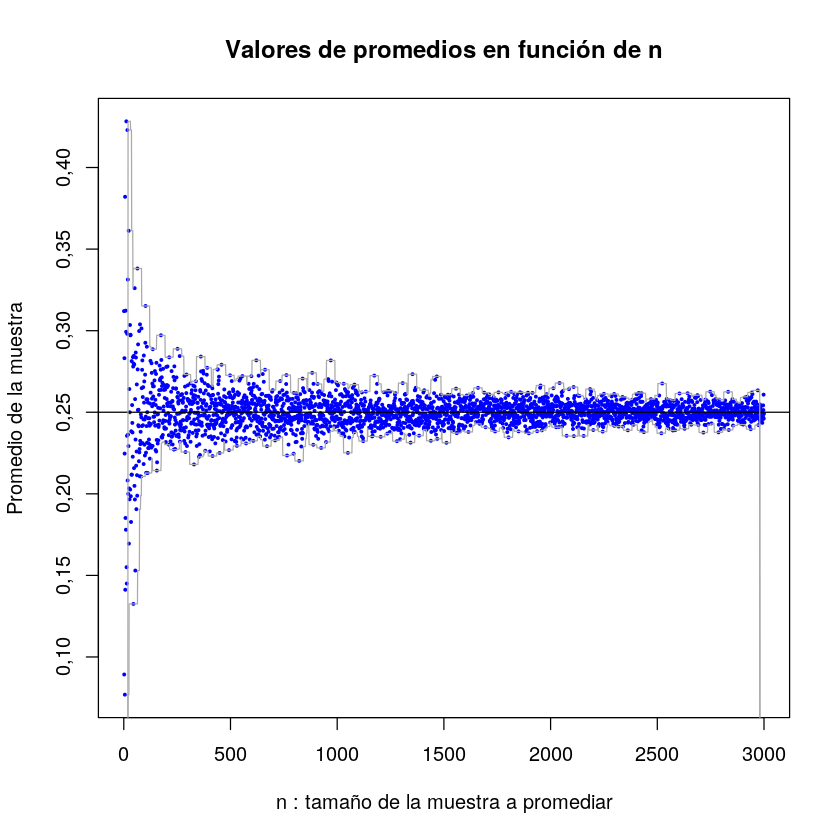

In [121]:
max_n  <- 3000
lambda <- 4 
promedios <- numeric(max_n)
for (i in 1:max_n) {
    promedios[i] <- sum(rexp(i, lambda))/i
}
#plot(c(1:max_n), promedios, cex=2, pch=19, col="darkgray")
plot(c(1:max_n), promedios, cex=0.3, pch=19, col="blue", xlab="", ylab="")
title(main="Valores de promedios en función de n", xlab="n : tamaño de la muestra a promediar",
     ylab="Promedio de la muestra")
#?plotmath # plot con latex
abline(h=1/lambda, cex=0.7)
# Flasheada
n_veci <- 20
cota_sup <- numeric(max_n)
cota_inf <- numeric(max_n)
for(i in n_veci:(max_n-n_veci)){
    vecinos <- (((i-n_veci+1):(i+n_veci)))
    cota_sup[i] <- max(promedios[vecinos])
    cota_inf[i] <- min(promedios[vecinos])
}
lines(c(1:max_n), cota_sup, cex=2, pch=19, col="darkgray")
lines(c(1:max_n), cota_inf, cex=2, pch=19, col="darkgray")


>  ¿Qué observa? ¿A qué se debe?

Se observa que los promedios que se obtienen con distintos $n$ se concentran en la esperanza $E[X_i]$ de la variable aleatoria de la que provienen las muestras:

$$X_i \sim \varepsilon(\lambda=4)$$

Cuya esperanza es

$$E[X_i] = \frac 1 \lambda = \frac 1 4$$

Ésto se debe a la [Ley de los Grandes Números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros), que demuestra que cualquier variable aleatoria con varianza finita, **convergerá** (en el límite) a su esperanza al promediarse $n$ realizaciones.

> 2. Para apreciar aún un poco más la **Ley de los Grandes Números**, realizar el siguiente experimento:
>
>   **(a)** Considerar dos observaciones $x_1$ y $x_2$ de variables aleatorias $X_1$ y $X_2$ independientes con distribución $\varepsilon(\lambda)$ y **guardar el promedio de ambas**, es decir, $\bar x_2$.
>   
>   Repetir 1000 veces y a partir de los valores obtenidos realizar un ***histograma, un boxplot y un QQ-plot***.
>
>   ¿Qué características tienen?


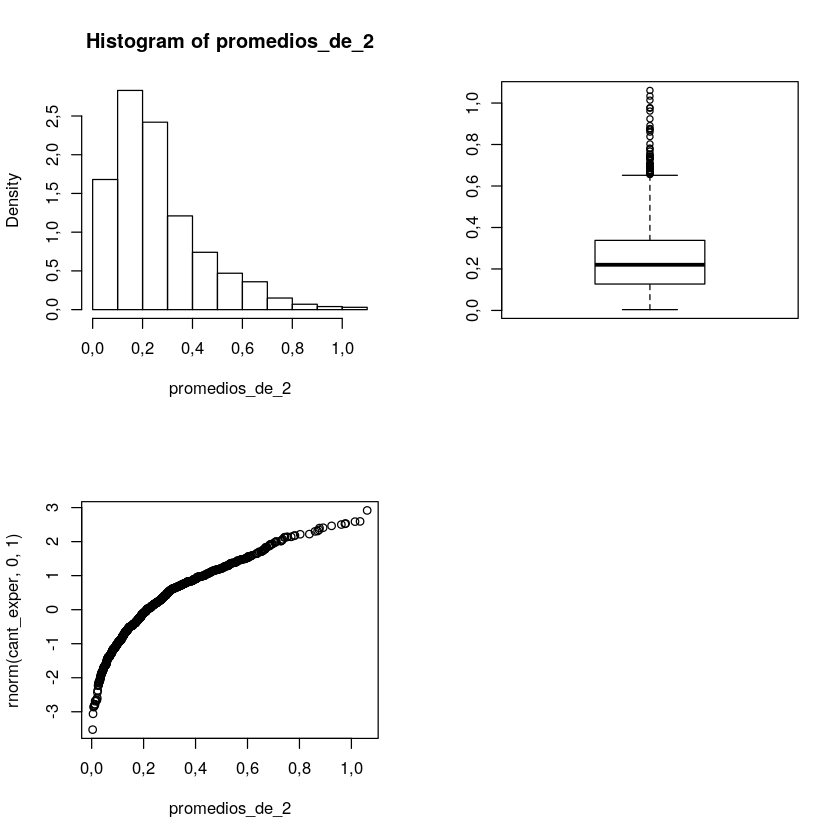

In [127]:
par(mfrow=c(2,2))

lambda <- 4
cant_exper <- 1000
promedios_de_2 <- numeric(cant_exper)
for(i in 1:cant_exper) {
    promedios_de_2[i] <- sum(rexp(2,lambda))/2
}
hist(promedios_de_2, freq=FALSE)
boxplot(promedios_de_2)
qqplot(promedios_de_2, rnorm(cant_exper, 0,1))

>   **(b)** Aumentar a **cinco** las **variables promediadas**, es decir, considerar ahora **n = 5** observaciones de variables aleatorias independientes con la misma distribución del ítem anterior y guardar $\bar x_5$.
>
>   Repetir 1000 veces y realizar un histograma, un boxplot y un QQ-plot para los valores obtenidos.
>
>   Comparar con los obtenidos en el ítem anterior. ¿Qué se observa?

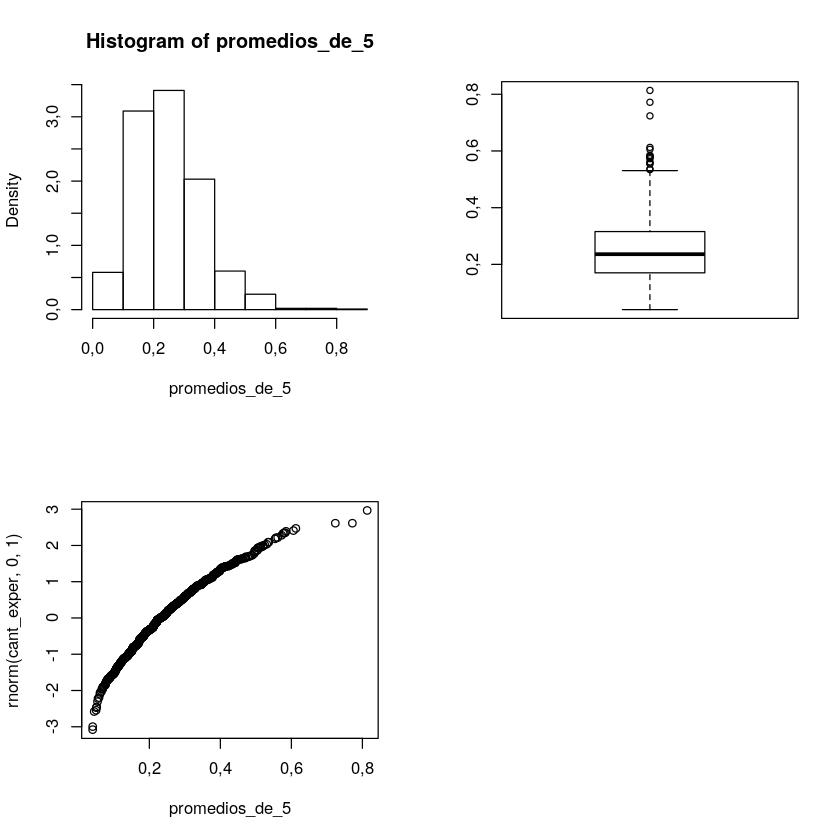

In [128]:
# 2b)
par(mfrow=c(2,2))

n <- 5
promedios_de_5 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_5[i] <- sum(rexp(n, lambda))/n
}
hist(promedios_de_5, freq=FALSE)
boxplot(promedios_de_5)
qqplot(promedios_de_5, rnorm(cant_exper, 0,1))

>   **(c)** Aumentar a n = 30 el número de observaciones de v.a. i.i.d. y repetir el ítem anterior.
>
>   Repetir todo con n = 500.

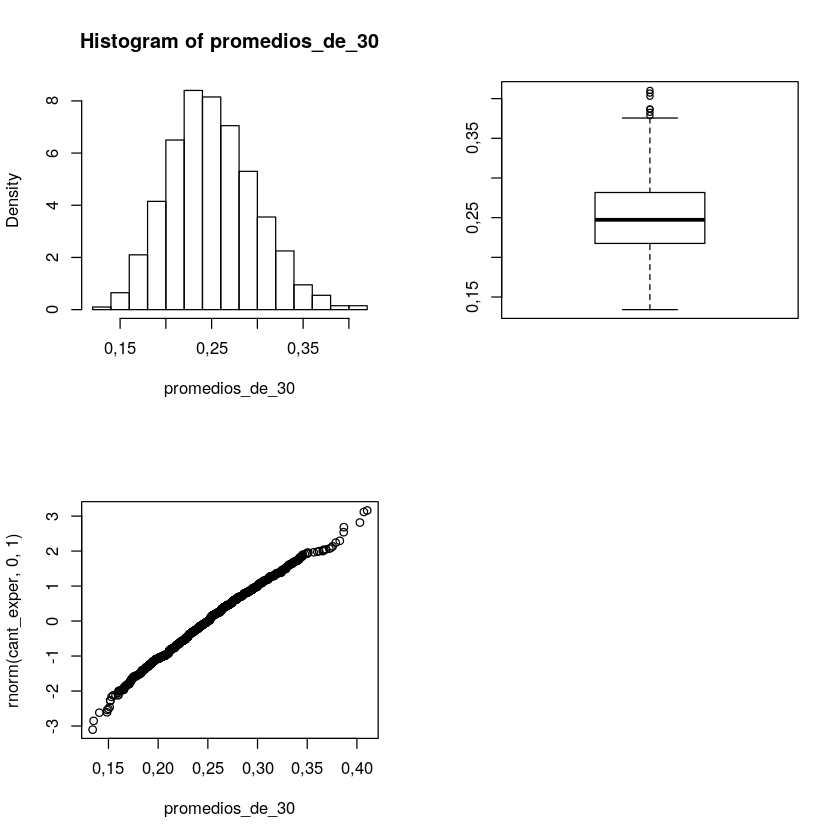

In [131]:
par(mfrow=c(2,2))

n <- 30
promedios_de_30 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_30[i] <- sum(rexp(n,lambda))/n
}
hist(promedios_de_30, freq=FALSE)
boxplot(promedios_de_30)
qqplot(promedios_de_30, rnorm(cant_exper, 0,1))



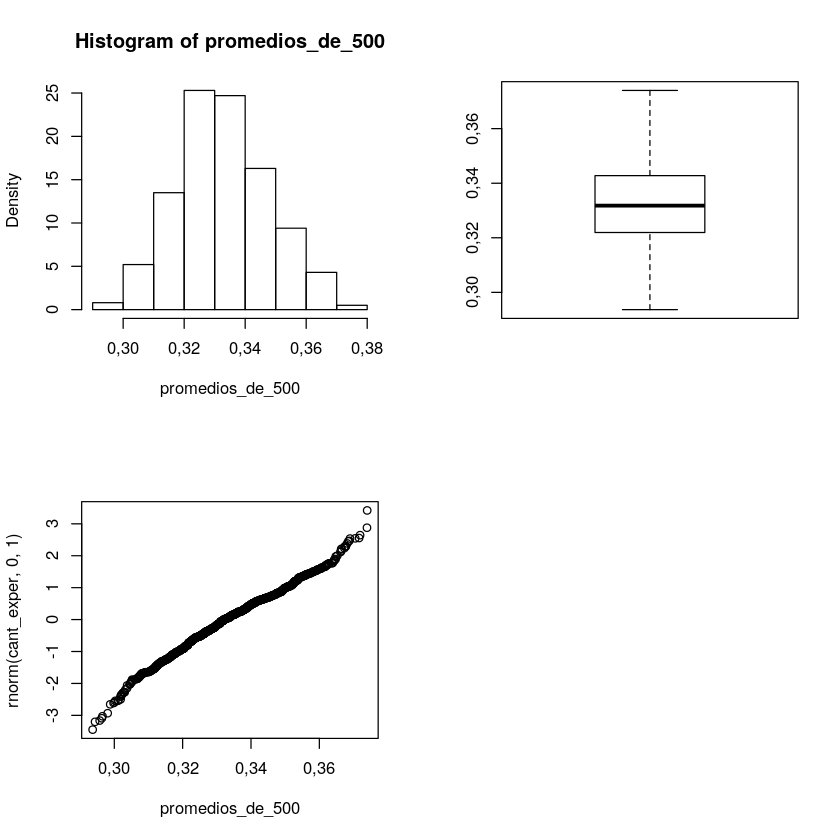

In [132]:
par(mfrow=c(2,2))

n <- 500
promedios_de_500 <- c(1:cant_exper)
for(i in 1:cant_exper) {
    promedios_de_500[i] <- sum(rexp(n,3))/n
}
hist(promedios_de_500, freq=FALSE)
boxplot(promedios_de_500)
qqplot(promedios_de_500, rnorm(cant_exper, 0,1))

>   **(d)** Realizar ***boxplots, histogramas y qqplots*** de los 4 conjuntos de datos en el mismo gráfico.
>
>   ¿Qué pasaría si se siguiera aumentando el tamaño de la muestra?

---

>3. El **Teorema Central del Límite** nos dice que cuando hacemos la siguiente transformación con los promedios: 
>
>   $$\frac{\bar X_n - E[X_1]}{\sqrt\frac{Var(X_1)}{n}}$$
>
>   la **distribución** de esta variable aleatoria se aproxima a la de la normal estándar si $n$ es ***suficientemente grande***.
>
>   Comprobaremos mediante una simulación este resultado.

> **(a)** Realizar la transformación mencionada en los 4 conjuntos de datos del ítem 2. y graficar boxplots paralelos y QQ-plots.

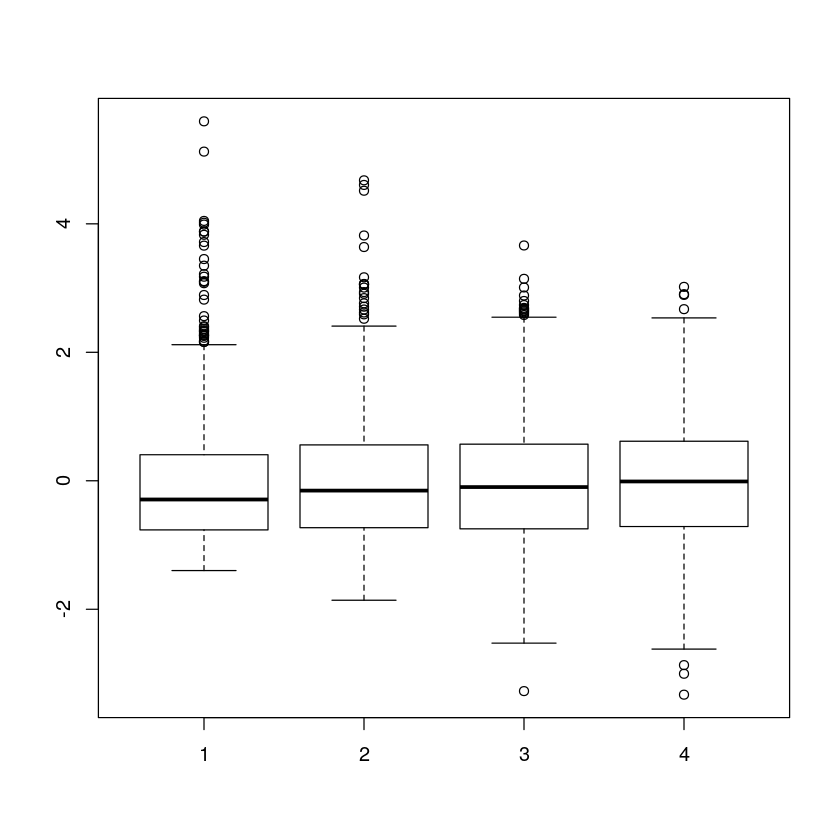

In [115]:
# 3a) Normalizamos

transfor2 <- (promedios2 - (1/3)) / sqrt((1/9) / 2)
transfor3 <- (promedios3 - (1/3)) / sqrt((1/9) / 5)
transfor4 <- (promedios4 - (1/3)) / sqrt((1/9) / 30)
transfor5 <- (promedios5 - (1/3)) / sqrt((1/9) / 500)

boxplot(transfor2, transfor3, transfor4, transfor5)



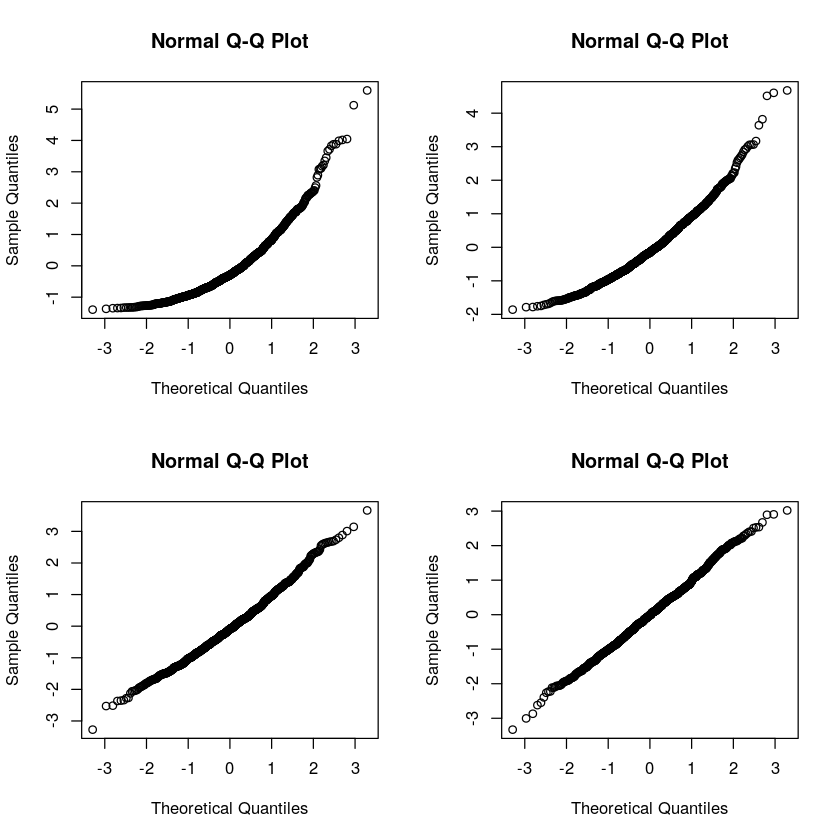

In [116]:
par(mfrow=c(2,2))
qqnorm(transfor2)
qqnorm(transfor3)
qqnorm(transfor4)
qqnorm(transfor5)

>**(b)** Realizar **4 histogramas** y a cada uno de ellos superponerle la **densidad de la normal estándar**.
>
>$Sugerencia$: una vez creado el histograma, utilizar la función `lines(grilla, dnorm(grilla))` con
`grilla` un vector de valores posibles (y consecutivos) para el eje x.

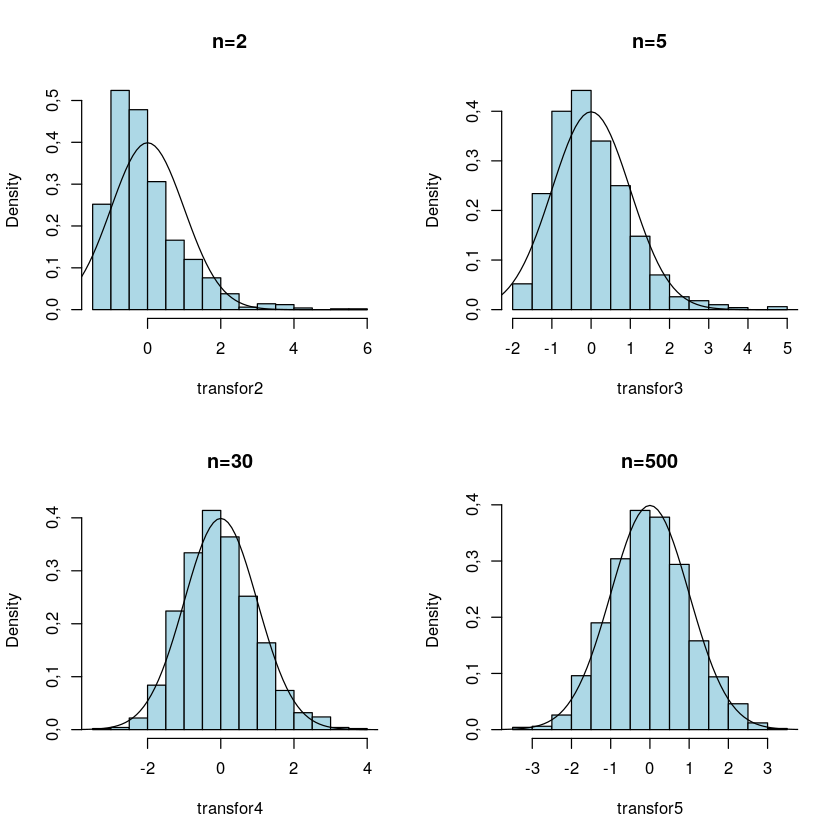

In [112]:
par(mfrow=c(2,2))

hist(transfor2, freq=FALSE, main="n=2", col="lightblue")
lines(seq(-6,6, 0.1), dnorm(seq(-6,6, 0.1)))

hist(transfor3, freq=FALSE, main="n=5", col="lightblue")
lines(seq(-6,6, 0.1), dnorm(seq(-6,6, 0.1)))

hist(transfor4, freq=FALSE, main="n=30", col="lightblue")
lines(seq(-6,6, 0.1), dnorm(seq(-6,6, 0.1)))

hist(transfor5, freq=FALSE, main="n=500", col="lightblue")
lines(seq(-6,6, 0.1), dnorm(seq(-6,6, 0.1)))

> **(c)** Explicar los resultados obtenidos.

> 4. Repetir los ítems anteriores generando ahora muestras de variables aleatorias independientes con distribución $Bi(n, p)$, con $n=\dots$ y $p=\dots$, y con la distribución de [ley de potencias](https://es.wikipedia.org/wiki/Ley_potencial).